In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
import scipy as scp

In [14]:
hbar = sp.symbols('hbar', real=True, positive=True)
t = sp.symbols('t', real=True)
t_0 = sp.symbols('t_0', real=True)
t_g = sp.symbols('t_g', real=True)
phi=  sp.symbols('varphi', real=True)
a = sp.symbols('a', real=True)
b = sp.symbols('b', real=True)
omega_01 = sp.symbols('\omega_{01}', real=True, positive=True)

try:
    display_
except NameError:
    display_ = display

try:
    print_
except NameError:
    print_ = print

def display(mat,do=False):
    if do:
        display_(mat)

def print(line,do=False):
    if do:
        print_(line)

def Omega(t,t_0,t_g):
    return sp.sin((t)*sp.pi/(2*t_g))**2
mat_01 = sp.Matrix([[0, 1], [0, 0]])
def H_part(omega_01,t,t_0,t_g):
    return 0.5*hbar*sp.exp(1j*phi)*(1+sp.exp(-2j*(omega_01*(t+t_0)+phi)))
def H(t,t_0,t_g):
    part_01 = H_part(omega_01,t,t_0,t_g)*Omega(t,t_0,t_g)
    mat = sp.Matrix([[0, part_01], [sp.conjugate(part_01), 0]])
    return mat
def U_gen(t,t_0,t_g,order=0):
    mat = sp.eye(2)
    if order == 0:
        return mat
    else:
        #u_part = sp.Integral(-1j/hbar*H(t,t_0,t_g),(t,a,b))
        u_part = -1j/hbar*H(t,t_0,t_g)
        display(u_part)
    ts = []
    print("U matrix product:")
    for i in range(order):
        ts.append(sp.symbols('t_'+str(i+1), real=True))
        #new = u_part.subs(a,t_0)
        #new = new.subs(b,ts[i])
        new = u_part.subs(t,ts[i])
        print("Addition:")
        display(new)
        mat = mat*new
        print("Result:")
        display(mat)
    print("U matrix integral:") 
    for i in range(order):
        lower = t_0
        if i != len(ts)-1:
            upper = ts[i+1]
        else:
            upper = t_g
        #mat = sp.Integral(mat,(ts[i],lower,upper))
        #instead of integrating the matrix, integrate every element
        for j in range(2):
            for k in range(2):
                if mat[j,k] != 0:
                    mat[j,k] = sp.Integral(mat[j,k],(ts[i],lower,upper))
        display(mat)
    return mat

U_test = U_gen(t,t_0,t_g,5)
#display
display(U_test)

U_series = []
for i in range(3):
    U_series.append(U_gen(t,t_0,t_g,i))
    display_(U_series[i])

"""U = U_series[0]
for i in range(1,l):
    U = U + U_series[i].doit() if isinstance(U_series[i], sp.Integral) else U + U_series[i]"""

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_90943/1389585794.py:8: SyntaxWarning: invalid escape sequence '\o'
  omega_01 = sp.symbols('\omega_{01}', real=True, positive=True)


Matrix([
[1, 0],
[0, 1]])

Matrix([
[                                                                                                                              0, Integral(-0.5*I*(1 + exp(-2.0*I*(\omega_{01}*(t_0 + t_1) + varphi)))*exp(1.0*I*varphi)*sin(pi*t_1/(2*t_g))**2, (t_1, t_0, t_g))],
[Integral(-0.5*I*(exp(2.0*I*(\omega_{01}*(t_0 + t_1) + varphi)) + 1)*exp(-1.0*I*varphi)*sin(pi*t_1/(2*t_g))**2, (t_1, t_0, t_g)),                                                                                                                               0]])

Matrix([
[Integral(-0.25*(1 + exp(-2.0*I*(\omega_{01}*(t_0 + t_1) + varphi)))*(exp(2.0*I*(\omega_{01}*(t_0 + t_2) + varphi)) + 1)*sin(pi*t_1/(2*t_g))**2*sin(pi*t_2/(2*t_g))**2, (t_1, t_0, t_2), (t_2, t_0, t_g)),                                                                                                                                                                                                        0],
[                                                                                                                                                                                                       0, Integral(-0.25*(1 + exp(-2.0*I*(\omega_{01}*(t_0 + t_2) + varphi)))*(exp(2.0*I*(\omega_{01}*(t_0 + t_1) + varphi)) + 1)*sin(pi*t_1/(2*t_g))**2*sin(pi*t_2/(2*t_g))**2, (t_1, t_0, t_2), (t_2, t_0, t_g))]])

'U = U_series[0]\nfor i in range(1,l):\n    U = U + U_series[i].doit() if isinstance(U_series[i], sp.Integral) else U + U_series[i]'

In [15]:
"""#just for the demo, perform this with dummy-values on [1,0]
test_series = U_series
t_0_sub = 0
t_g_sub = 1
omega_01_sub = 1

def integrate_job(i):
    test_series[i] = test_series[i].subs(t_0,t_0_sub)
    test_series[i] = test_series[i].subs(t_g,t_g_sub)
    test_series[i] = test_series[i].subs(omega_01,omega_01_sub)
    test_series[i] = test_series[i].doit()
    display(test_series[i])

with Pool(16) as p:
    list(tqdm(p.imap(integrate_job,range(len(test_series))),total=len(test_series)))"""

'#just for the demo, perform this with dummy-values on [1,0]\ntest_series = U_series\nt_0_sub = 0\nt_g_sub = 1\nomega_01_sub = 1\n\ndef integrate_job(i):\n    test_series[i] = test_series[i].subs(t_0,t_0_sub)\n    test_series[i] = test_series[i].subs(t_g,t_g_sub)\n    test_series[i] = test_series[i].subs(omega_01,omega_01_sub)\n    test_series[i] = test_series[i].doit()\n    display(test_series[i])\n\nwith Pool(16) as p:\n    list(tqdm(p.imap(integrate_job,range(len(test_series))),total=len(test_series)))'

In [16]:
def sympy_to_nquad(integral_expr):
    #!ChatGPT code
    """Converts a sympy Integral expression to scipy's nquad format"""
    
    # Extract variables
    integrands = integral_expr.function.as_ordered_terms()
    integrand = sp.lambdify(integral_expr.variables, integrands, modules=["numpy"])
    #test
    #print_(integrand([0.5]*len(integral_expr.variables)))
    integrand_ = lambda *args: integrand(*args)[0] if len(integrands) == 1 else integrand(*args)
    #print_(integrand_([0.5]*len(integral_expr.variables)))

    #next, find the integration limits as functions
    limits = []
    def bounds(*args):
        x = args[0]
        return 0,x
    
    for i in integral_expr.limits:
        limits.append((i[1],i[2]))
        #make a function definition in case the entry is symbolic
        if isinstance(i[2],sp.Symbol):
            #exec(f"{i[2]} = sp.symbols('{i[2]}', real=True)")
            if not isinstance(i[1],sp.Symbol):
                val = i[1]
                limits[-1] = bounds
            else:
                raise NotImplementedError
        elif isinstance(i[1],sp.Symbol):
            raise NotImplementedError

    
    return integrand_, limits

    # Define integrand as a lambda function
    integrand = sp.lambdify(vars_order, integral_expr.function, modules=["numpy"])
    
    # Extract integration limits
    limits = []
    for var in vars_order:
        for i in integrals:
            if i.limits[0] == var:
                lims = i.limits[1:]  # Ignore the variable itself
                if len(lims) == 1:  # Definite integral with only an upper bound
                    limits.append([0, lims[0]])  # Assume lower bound is 0
                else:
                    limits.append([lims[0], lims[1]])

    return integrand, limits

In [23]:
eigenset = {
    'z': [sp.Matrix([1,0]),sp.Matrix([0,1])],
    'x': [sp.Matrix([1,1])/sp.sqrt(2),sp.Matrix([1,-1])/sp.sqrt(2)],
    'y': [sp.Matrix([1,-1j])/sp.sqrt(2),sp.Matrix([1,1j])/sp.sqrt(2)]
}
combinatorics = ['z','x','y']
combinatorics = np.meshgrid(combinatorics,combinatorics)

gate_2_implement = sp.Matrix([[0,1],[1,0]])

def job(i,U_part,t_0_e,t_g_e,omega_01_e,phi_e):
    #print_(f"Integrating {i+1}")
    new = U_part.subs(t_0,t_0_e)
    new = new.subs(t_g,t_g_e)
    new = new.subs(omega_01,omega_01_e)
    new = new.subs(phi,phi_e)
    #numerically integrate it
    #print_("Integrating:")
    #display_(new)
    #integrand, limits = sympy_to_nquad(new)
    new_results = []
    for i in range(new.shape[0]):
        new_results.append([])
        for j in range(new.shape[1]):
            #print_(f"Lambdyfying {new[i,j]}")
            if new[i,j] == 0:
                new_results[-1].append(0)
                continue
            integrand, limits = sympy_to_nquad(new[i,j])
            integrand_re = lambda *args: integrand(*args).real
            integrand_im = lambda *args: integrand(*args).imag
            results_re, _ = scp.integrate.nquad(integrand_re, limits)
            results_im, _ = scp.integrate.nquad(integrand_im, limits)
            results = results_re + 1j*results_im
            new_results[-1].append(results)
    results = sp.Matrix(new_results)
    new = results
    #print_("Result:")
    #display_(new)
    #gate_2_optimize = gate_2_optimize + new
    #additions[i-1] = new
    #print_(f"Finished integrating {i+1}")
    return new
    #return None

def get_gate_2_optimize(t,t_0_e,t_g_e,omega_01_e,phi_e):
    #use the U_series, do the numerical integral (once), and return the resulting matrix
    gate_2_optimize = None

    if gate_2_optimize is None:
        gate_2_optimize = U_series[0]
        #additions = [0]*(len(U_series)-1)
        
        with Pool(16) as p:
            l = len(U_series)-1
            results = p.starmap(job,
                                [
                                    (
                                        i,
                                        U_series[i+1],
                                        t_0_e,
                                        t_g_e,
                                        omega_01_e,
                                        phi_e
                                        ) for i in range(l)])
        p.close()
        p.join()
        """results = [
            job(
                i,
                U_series[i+1],
                t_0_e,
                t_g_e,
                omega_01_e,
                phi_e
            ) for i in range(len(U_series)-1)
        ]"""
        for i in range(len(results)):
            gate_2_optimize = gate_2_optimize + results[i]
    return gate_2_optimize


y_targets = []
for i,a in enumerate(combinatorics[0].flatten()):
    for j,b in enumerate(combinatorics[1].flatten()):
        y_targets.append(eigenset[a][0].T.conjugate()*gate_2_implement*eigenset[b][0])
        y_targets.append(eigenset[a][0].T.conjugate()*gate_2_implement*eigenset[b][1])
        y_targets.append(eigenset[a][1].T.conjugate()*gate_2_implement*eigenset[b][0])
        y_targets.append(eigenset[a][1].T.conjugate()*gate_2_implement*eigenset[b][1])




In [24]:
def cost_function(y_targets,y_actuals):
    def loss(y_target,y_actual):
        y_target = np.abs(complex(y_target[0]))
        y_actual = np.abs(complex(y_actual[0]))
        #def an entropic loss
        if y_target < 0:
            return 0
        return -np.log(y_actual)*y_target - np.log(1-y_actual)*(1-y_target)
    return sum([loss(y_target,y_actual) for y_target,y_actual in zip(y_targets,y_actuals)])

0it [00:00, ?it/s]/tmp/ipykernel_90943/1233448497.py:8: RuntimeWarning: invalid value encountered in log
  return -np.log(y_actual)*y_target - np.log(1-y_actual)*(1-y_target)
100it [00:44,  2.24it/s]


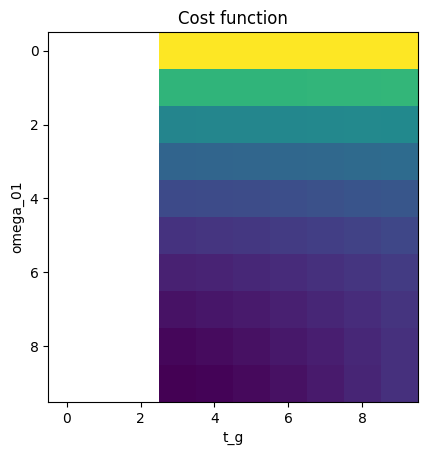

In [27]:
#parameter samples:
t_0_samples = [0]
t_g_samples = np.linspace(0.1,1,10)
omega_01_samples = np.linspace(0.1,1,10)
phi_samples = [0]
parameter_grid = np.meshgrid(t_0_samples,t_g_samples,omega_01_samples,phi_samples)
shape = parameter_grid[0].shape
parameter_grid = zip(parameter_grid[0].flatten(),parameter_grid[1].flatten(),parameter_grid[2].flatten(),parameter_grid[3].flatten())

def cost_function_wrapper(parameter):
    t_0 = parameter[0]
    t_g = parameter[1]
    omega_01 = parameter[2]
    phi = parameter[3]
    y_actuals = []
    gate_2_optimize = get_gate_2_optimize(t,t_0,t_g,omega_01,phi)
    for i,a in enumerate(combinatorics[0].flatten()):
        for j,b in enumerate(combinatorics[1].flatten()):
            y_actuals.append(eigenset[a][0].T.conjugate()*gate_2_optimize*eigenset[b][0])
            y_actuals.append(eigenset[a][0].T.conjugate()*gate_2_optimize*eigenset[b][1])
            y_actuals.append(eigenset[a][1].T.conjugate()*gate_2_optimize*eigenset[b][0])
            y_actuals.append(eigenset[a][1].T.conjugate()*gate_2_optimize*eigenset[b][1])
    return cost_function(y_targets,y_actuals)

costs = np.zeros(shape).flatten()
for i,p in enumerate(tqdm(parameter_grid)):
    costs[i] = cost_function_wrapper(p)

#do visual costplot by t_g and omega_01
costs = costs.reshape(len(t_g_samples),len(omega_01_samples))
plt.xlabel('t_g')
plt.ylabel('omega_01')
plt.title('Cost function')
plt.imshow(costs)
plt.show()
